### __Animation__

So far we focused on static images, but matplotlib does have some support for animation. This requires a separate library to use in the Jupyter notebook called ipympl, and I've installed that for you here. Animation depends on this library because it provides a new backend for us, call the widget backend. Let's turn that on here.

The Maplotlib.animation module contains important helpers for building animations, and for our discussion today the important object we are going to use is called FuncAnimation. This builds an animation by iteratively calling a function which you define. This function's job is to clear the axis object and redraw the next frame of the animation. Then these frames are all stacked together into a playable video.

I like to use this demonstration in my classes here at Michigan to show students how distributions can be sampled from. So we're going to build a basic animation which is going to pull 100 samples out of the normal distribution. Let's generate that data now.

Okay, next we want to actually create a function which will do the plotting. We'll call this function update. Now the matplotlib FuncAnimation object is going to call this every few milliseconds and pass in the frame number we are on starting with frame zero. So we can use this is as the index into our array values, which we called x.

The very first thing we want to do is see if the current frame is at the end of our list. If so, we need to tell the animation to stop. We do this by calling the stop object on the event source object attached to the FuncAnimation object.

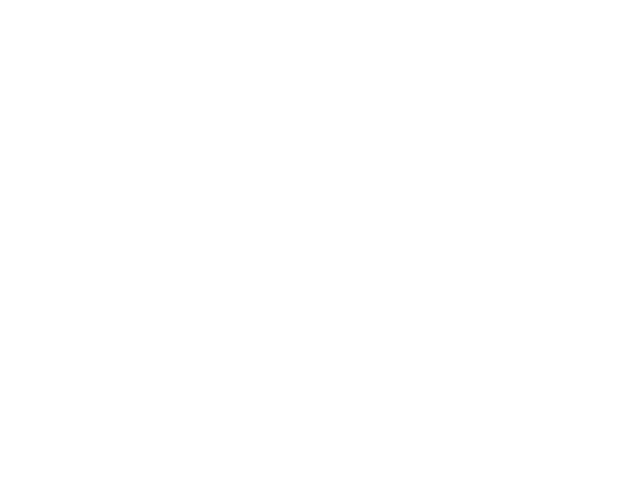

In [1]:
%matplotlib widget

# We can bring in some other libraries we will need too, including the 
# matplotlib animation module

import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np

n = 100
x = np.random.randn(n)
# create the function that will do the plotting, where curr is the current frame
def update(curr):
    # check if animation is in the last frame, and if so, stop the animation a
    if curr >= n:
        a.event_source.stop()
        
        # What is a? Well, it's an object that we'll define in a bit, and it will
        # sit outside of this function but we can still access it since python allows
        # us to access variables in the global scope.

    # Now on to the work. First thing we want to do is clear the current axes.
    # We can do this with plt.cla().
    plt.cla()

    # Now I just want to plot a histogram. I'm going to set my bins to a predictable
    # value so it doesn't jump around, but you can play with this
    bins = np.arange(-4,4,0.5)

    # Then we just make the hist() using the current frame number which was passed
    # into the function and our global values array
    plt.hist(x[:curr], bins=bins)

    # set the axes limits
    plt.axis([-4,4,0,30])

    # And add some nice labels throughout
    plt.gca().set_title('Sampling the Normal Distribution')
    plt.gca().set_ylabel('Frequency')
    plt.gca().set_xlabel('Value')
    plt.annotate('n = {}'. format(curr), [3,27])


# Quick to start
a = animation.FuncAnimation(plt.figure(), update, interval=100,repeat=False, frames=np.arange(1, n + 1),blit=False)

# Now tell the widget back end it's time to show!
plt.show()


Now most of our hard work is done so we just have to view it. To do this, we just generate a new figure, then call the FuncAnimation constructor and we'll assign this to variable a, since we need this for our update() function which will stop the animation at the end. The first parameter is the figure that we're working with. This isn't so important here, since we're using the pylot scripting interface to manage the figure. Then the name of our function and then the amount of time we want between updates. Let's set this to 100 milliseconds.

In [3]:
plt.close('all')